Aluno: Felipe Miranda Cardoso de Sá
<br> Matrícula: 201802677
<br> PDI - Processamento Digital de Imagens
<br> Professor: Cassio Denner

In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import math
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [147]:
keth = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg", cv2.IMREAD_GRAYSCALE)
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)
imagem_5_4_a = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0504(a)(gaussian-noise).tif", cv2.IMREAD_GRAYSCALE)
imagem_5_4_i = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0504(i)(salt-pepper-noise).tif", cv2.IMREAD_GRAYSCALE)
imagem_335 = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif", cv2.IMREAD_GRAYSCALE)
imagem_334 = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0334(a)(hubble-original).tif", cv2.IMREAD_GRAYSCALE)

Testando o filtro de média simples e gausseano

In [148]:
def montarFiltroGaussiano(m,n, sigma):
  # chamada ex.: h = montarFiltroGaussiano(3,3,3)
  # iniciliza o filtro h
  h = np.zeros((m,n), dtype = np.float32)

  # calcula os deslocamentos
  a = (m-1)/2
  b = (n-1)/2

  for x in range(m):
        for y in range(n):
              h[x,y] = np.exp(-(((x-a)**2) + ((y-b)**2))/(2*(sigma**2)))

  h = h/np.sum(h)
  return h


In [149]:
h = montarFiltroGaussiano(3,3,3)
h

array([[0.1069973 , 0.11310981, 0.1069973 ],
       [0.11310981, 0.11957152, 0.11310981],
       [0.1069973 , 0.11310981, 0.1069973 ]], dtype=float32)

In [150]:
def aplica_filtro(img, filtro):
  W, H = img.shape

  new_img = img.copy() 

  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))

  s = 1 / np.sum(filtro) #sum of filters coefficients

  for v in range(L, H - L):               # H - L - 1 (+1) 
    for u in range(K, W - K):             # W - K - 1 (+1)
                                      
      img_sum = 0
      for j in range(-L, L+1):            #[-L, ... , L]  
                    
        for i in range(-K, K+1):          #[-K, ... , K]
                 
          p = img[u+i, v+j]             #get pixel
          c = filtro[j+L-1][i+K-1]
          img_sum += (c * p)

      q = round(img_sum * s)

      #clampping
      if q < 0: q = 0
      elif q > 255: q = 255

      new_img[u, v] = q

  return new_img

In [151]:
filtro = np.ones((3,3))
filtro

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

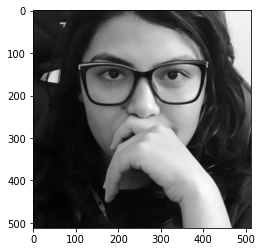

In [152]:
keth_media = aplica_filtro(keth, filtro)
plt.figure(0)
plt.imshow(keth_media, cmap='gray')

In [153]:
h

array([[0.1069973 , 0.11310981, 0.1069973 ],
       [0.11310981, 0.11957152, 0.11310981],
       [0.1069973 , 0.11310981, 0.1069973 ]], dtype=float32)

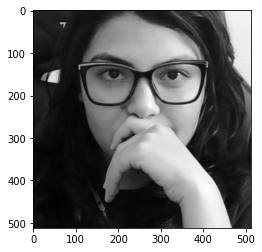

In [154]:
keth_gauss = aplica_filtro(keth, h)
plt.figure(0)
plt.imshow(keth_gauss, cmap='gray')

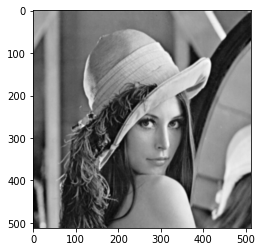

In [155]:
lena_media = aplica_filtro(lena, filtro)
plt.figure(0)
plt.imshow(lena_media, cmap='gray')

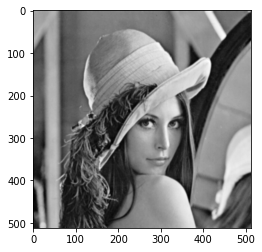

In [156]:
lena_gauss = aplica_filtro(lena, h)
plt.figure(0)
plt.imshow(lena_gauss, cmap='gray')

Imagem Gonzalez, 5.4a

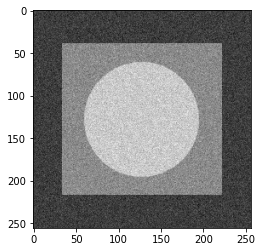

In [157]:
plt.figure(0)
plt.imshow(imagem_5_4_a, cmap='gray')

In [158]:
filtro = np.ones((3,3))
filtro

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

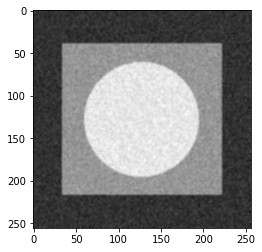

In [159]:
imagem_5_4_a_media = aplica_filtro(imagem_5_4_a, filtro)
plt.figure(0)
plt.imshow(imagem_5_4_a_media, cmap='gray')

Observando os tons de cinza intermediários, observamos que o filtro gausseano trata melhor este ruido

In [160]:
h = montarFiltroGaussiano(3,3,3)
h

array([[0.1069973 , 0.11310981, 0.1069973 ],
       [0.11310981, 0.11957152, 0.11310981],
       [0.1069973 , 0.11310981, 0.1069973 ]], dtype=float32)

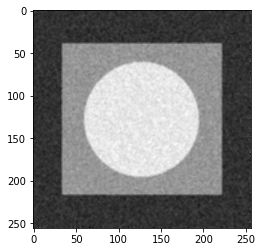

In [161]:
imagem_5_4_a_gauss = aplica_filtro(imagem_5_4_a, h)
plt.figure(0)
plt.imshow(imagem_5_4_a_gauss, cmap='gray')

Imagem Gonzalez, 5.4i - ruido salt and pepper

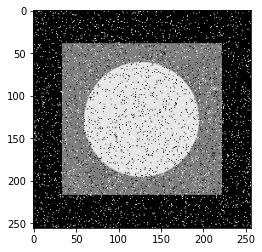

In [162]:
plt.figure(0)
plt.imshow(imagem_5_4_i, cmap='gray')

Imagem com filtro gausseano

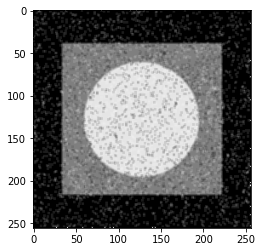

In [163]:
imagem_5_4_i_gauss = aplica_filtro(imagem_5_4_i, h)
plt.figure(0)
plt.imshow(imagem_5_4_i_gauss, cmap='gray')

In [164]:
def filtro_mediana(img):
  W, H = img.shape

  new_img = img.copy() 
  filtro = np.ones((3,3))
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))


  for v in range(L, H - L):               # H - L - 1 (+1) 
    for u in range(K, W - K):             # W - K - 1 (+1)
                                      
      vetor_mediana = []
      for j in range(-L, L+1):            #[-L, ... , L]  
                    
        for i in range(-K, K+1):          #[-K, ... , K]
                 
          p = img[u+i, v+j]             #get pixel
          vetor_mediana.append(p)

      

      vetor_mediana.sort()
      new_img[u, v] = np.median(vetor_mediana)
      

  return new_img

Em comparação com o flitro gausseano, o filtro de mediana obtém melhores resultados

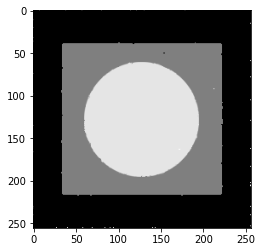

In [165]:
imagem_5_4_i_mediana = filtro_mediana(imagem_5_4_i)
plt.figure(0)
plt.imshow(imagem_5_4_i_mediana, cmap='gray')

Gonzalez (Fig. 3.34)

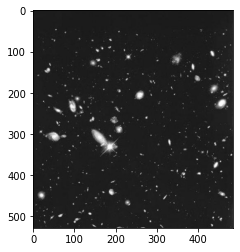

In [166]:
plt.figure(0)
plt.imshow(imagem_334, cmap='gray')

Filtro de média 15x15

In [167]:
filtro = np.ones((15,15))
filtro

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.

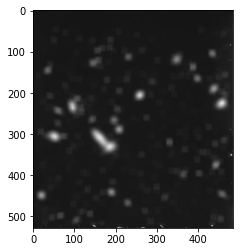

In [168]:
imagem_334_media = aplica_filtro(imagem_334, filtro)
plt.figure(0)
plt.imshow(imagem_334_media, cmap='gray')

Filtro de mediana 

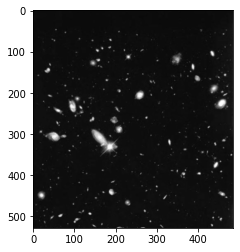

In [169]:
imagem_334_mediana = filtro_mediana(imagem_334)
plt.figure(0)
plt.imshow(imagem_334_mediana, cmap='gray')

Gonzalez (Fig. 3.35)

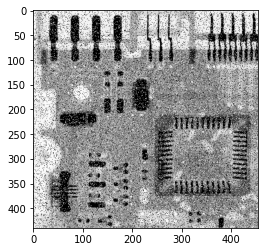

In [170]:
plt.figure(0)
plt.imshow(imagem_335, cmap='gray')

Filtro de média

In [171]:
filtro = np.ones((3,3))
filtro

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

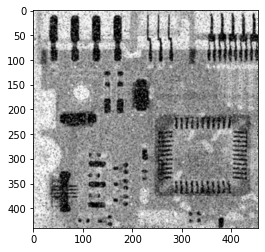

In [172]:
imagem_335_media = aplica_filtro(imagem_335, filtro)
plt.figure(0)
plt.imshow(imagem_335_media, cmap='gray')

Filtro de mediana

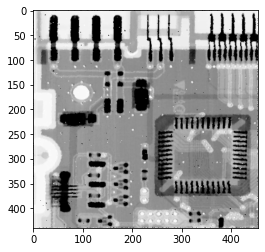

In [173]:
imagem_335_mediana = filtro_mediana(imagem_335)
plt.figure(0)
plt.imshow(imagem_335_mediana, cmap='gray')

Função pulso

In [174]:
def create_pulse(W, H):
  pulse = np.zeros((W, H))
  pulse[int(np.floor(W/2)), int(np.floor(H/2))] = 1
  return pulse


In [175]:
pulse = create_pulse(5,5)
pulse

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Imagem antes do pulso

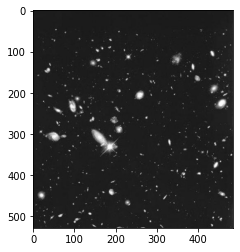

In [176]:
plt.figure(0)
plt.imshow(imagem_334, cmap='gray')

Imagem após o pulso

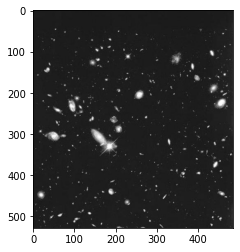

In [182]:
imagem_334_pulse = aplica_filtro(imagem_334, pulse)
plt.figure(0)
plt.imshow(imagem_334_pulse, cmap='gray')

Observamos, assim como esperado que a imagem não sofre alterações

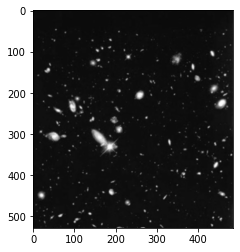

In [184]:
imagem_334_gauss = aplica_filtro(imagem_334, h)
plt.figure(0)
plt.imshow(imagem_334_gauss, cmap='gray')

Imagem * filtro gausseano * pulso

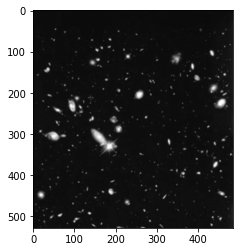

In [185]:
imagem_334_gauss_pulso = aplica_filtro(aplica_filtro(imagem_334, h), pulse)
plt.figure(0)
plt.imshow(imagem_334_gauss_pulso, cmap='gray')

In [186]:
pulso_centro_2_2 = [[0,0,0,0],
                    [0,1,1,0],
                    [0,1,1,0],
                    [0,0,0,0],
                    ]

pulso_centro_3_3 = [[0,0,0,0,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,0,0,0,0],
                   ]

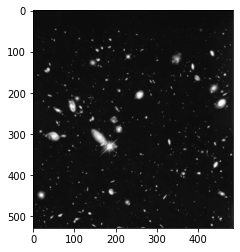

In [187]:
imagem_334_pulso_2_2 = aplica_filtro(imagem_334, pulso_centro_2_2)
plt.figure(0)
plt.imshow(imagem_334_pulso_2_2, cmap='gray')

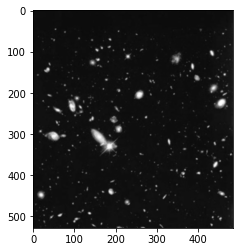

In [188]:
imagem_334_pulso_3_3 = aplica_filtro(imagem_334, pulso_centro_3_3)
plt.figure(0)
plt.imshow(imagem_334_pulso_3_3, cmap='gray')

Notamos que pulsos de tamanhos distintos também não afetam a imagem